<a href="https://colab.research.google.com/github/nurastars/belajardata.github.io/blob/master/Tugas_dicoding.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Proyek Analisis Data: Nama dataset
- Nama: Mujib Sukri Luman
- Email: faisolnajihi@gmail.com
- Id Dicoding: Mujib Sukri Luman

## Menentukan Pertanyaan Bisnis

- pertanyaan 1
> *1. Setiap pelaku bisnis mengharapkan efesiensi dari semua aspek tentu diutamakan, tanpa abai terhadap pelanyanan maksimal demi menjaga kepuasan customers. sebagai bisnismen yang bergelut dibidang rental bike berkeinginan untuk lebih efesien terhadap perawatan bike dan pengurangan karyawan. Pada keadaan cuaca yang bagaimana dan pada musim apa yang harus diterapkan penambahan dan pengurangan karyawan serta perawatan yang harus ditingkatkan?*


- pertanyaan 2
>*2. melek terhadap peluang bisnes merupakan bagian yang terpenting dalam membaca neraca pergerakan bisnis. berdasarkan data yang ada, apa yang melatar belakangi para customers meminati bike dan temukan ketergantungan mereka terhadap bike?*


## Menyaipkan semua library yang dibuthkan

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from jcopml.plot import plot_missing_value
import seaborn as sns

## Data Wrangling

### Gathering Data

In [2]:
data = pd.read_csv('hour.csv')
data.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Assessing Data

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [4]:
data.duplicated().sum()

0

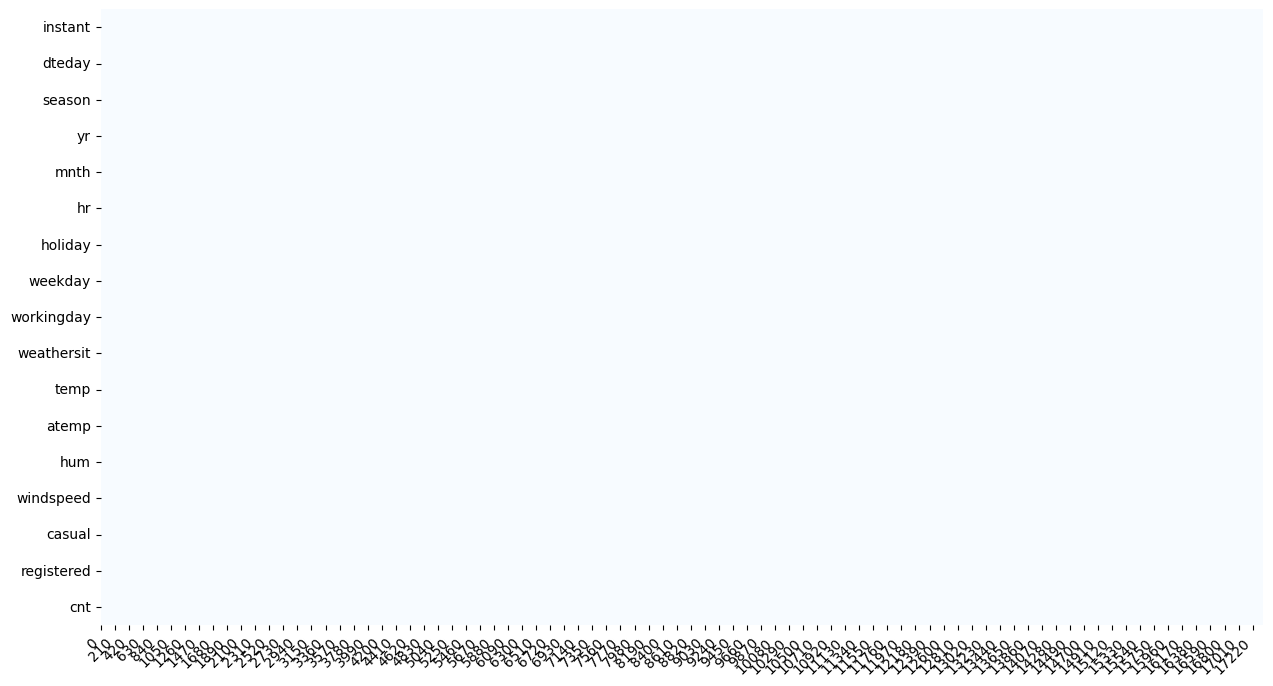

In [5]:
plot_missing_value(data)

***Penggalian Informasi Data, Didapatkan :***

> *1. Terdapat  jumlah data 17379 dengan jumlah kolom 17*

> *2. Feature adalah float, 7 feature adalah intiger, 6 feature bertipe Objek*

> *3. Pada keseluruhan tidak ditemukan nilai data yang hilang*

### Cleaning Data

>*penghapusan variable yang tidak memiliki korelasi dengan analisis di bawah ini*

In [6]:
data.drop(columns=('instant'), inplace=True)

## Exploratory Data Analysis (EDA)

### Explore ...

In [7]:
# mengubah nama variable agar mudah di baca
data.rename(columns= {
    'dteday':'dateday','yr':'year','mnth':'month','hr':'hour', 'weekday':'week_day', 'workingday':'working_day',
    'weathersit':'weather_situation','atemp':'temp_feel', 'hum':'humidity','windspeed':'wind_speed','cnt':'count'},inplace=True)

# memasukkan nama musim pada setiap nomer urutan
season_provvided = {1:'springer', 2:'summer', 3:'fall', 4:'winter'}
data['season'] = data['season'].map(season_provvided)

# memberikan nama disetiap situasi cuaca yang diambil dari dataset yang telah disiapkan
weather_newCodes = {1:'clear', 2:'mist', 3:'light snow', 4:'heavy rain'}
data['weather_situation'] = data['weather_situation'].map(weather_newCodes)


# memberikan label 0 = holiday dan 1 = bekerja
working_or_not = {0:'holiday', 1:'working'}
data['working_day'] = data['working_day'].map(working_or_not)

# meletakkan nama-nama bulan disetiap tahunnya
month_names = {1:'January', 2:'February', 3:'March', 4:'April', 5:'May', 6:'June', 7:'July', 8:'August', 9:'September',
              10:'October', 11:'November', 12:'Desember'}
data['month']= data['month'].map(month_names)

# mengubah nilai 0 = 2011 dan 1 = 2012
years = {0:'2011', 1:'2012'}
data['year']= data['year'].map(years)
data.head(1)

,dateday,season,year,month,hour,holiday,week_day,working_day,weather_situation,temp,temp_feel,humidity,wind_speed,casual,registered,count
0,2011-01-01,springer,2011,January,0,0,6,holiday,clear,0.24,0.2879,0.81,0.0,3,13,16


> *extrak hari dari variable dateday tujuannya agar bisa dilacak sedetail mungkin di hari apa saja yang meningkat para peminat dalam satu minggunya.*

In [8]:
data.dateday = pd.to_datetime(data.dateday)
data['day'] = data['dateday'].dt.day_name()

## Visualization & Explanatory Analysis

### Pertanyaan 1:
> *1. Setiap pelaku bisnis mengharapkan efesiensi dari semua aspek tentu diutamakan, tanpa abai terhadap pelanyanan maksimal demi menjaga kepuasan customers. sebagai bisnismen yang bergelut dibidang rental bike berkeinginan untuk lebih efesien terhadap perawatan bike dan pengurangan karyawan. Pada keadaan cuaca yang bagaimana dan pada musim apa yang harus diterapkan penambahan dan pengurangan karyawan serta perawatan yang harus ditingkatkan?*

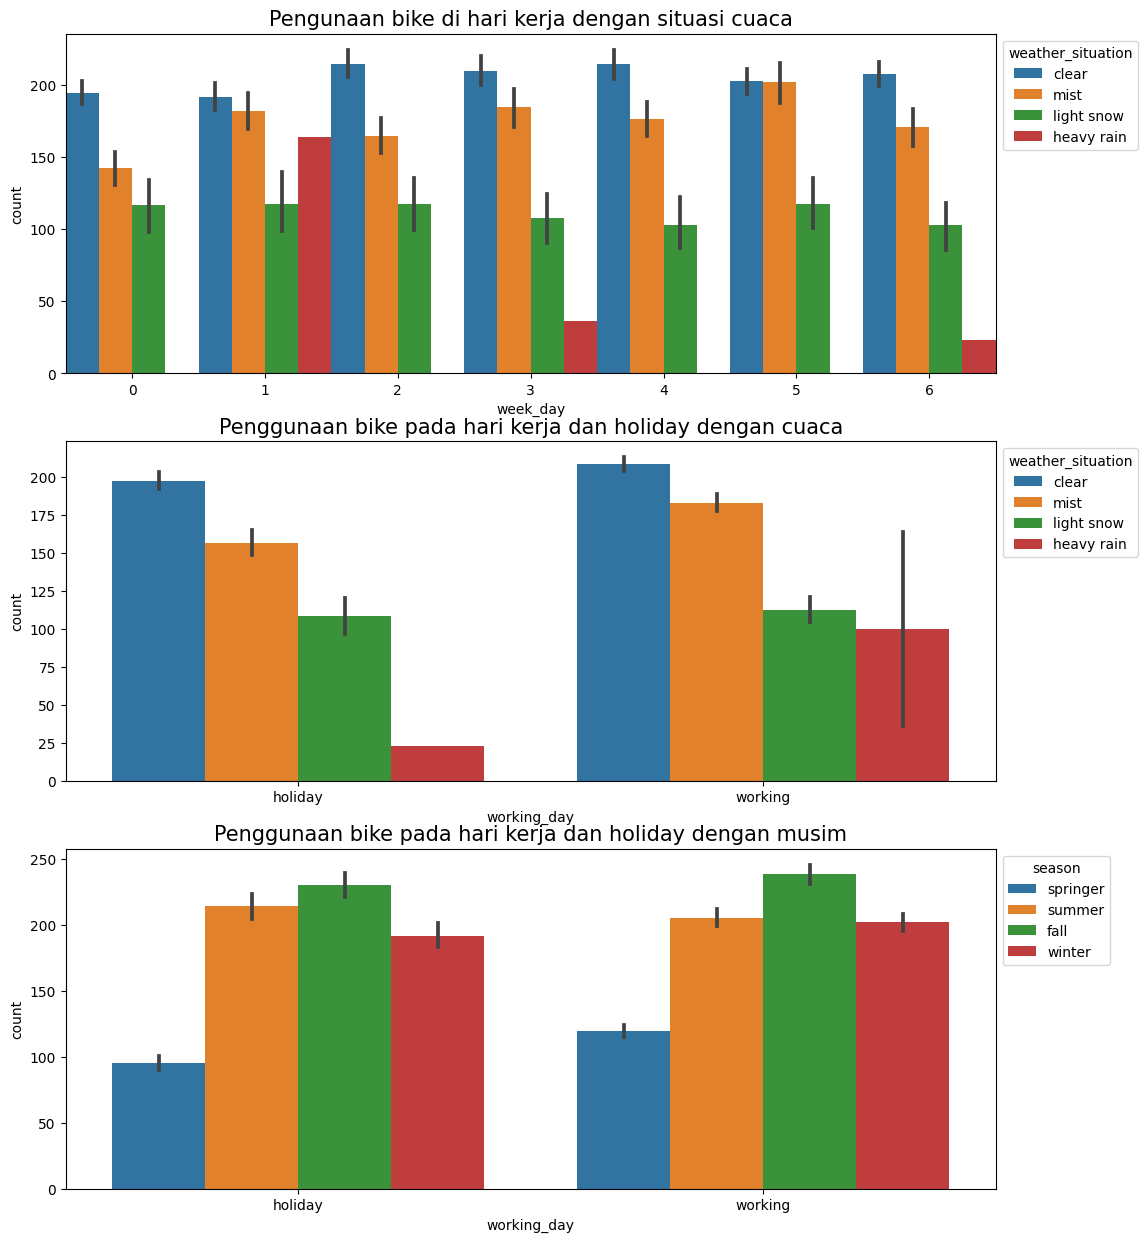

In [9]:
fig,ax= plt.subplots(nrows=3)
fig.set_size_inches(12, 15)

ax0 = sns.barplot(data=data, x='week_day', y='count', hue='weather_situation', ax=ax[0], width=1)
ax1 = sns.barplot(data=data, x='working_day', y='count', hue='weather_situation', ax=ax[1])
ax2 = sns.barplot(data=data, x='working_day', y='count', hue='season', ax=ax[2])

sns.move_legend(ax0, "upper left", bbox_to_anchor=(1, 1))
sns.move_legend(ax1, "upper left", bbox_to_anchor=(1, 1))
sns.move_legend(ax2, "upper left", bbox_to_anchor=(1, 1))

ax0.set_title('Pengunaan bike di hari kerja dengan situasi cuaca', fontdict={'size':15})
ax1.set_title('Penggunaan bike pada hari kerja dan holiday dengan cuaca', fontdict={'size':15})
ax2.set_title('Penggunaan bike pada hari kerja dan holiday dengan musim', fontdict={'size':15});

**insight dari perbandingan**

> *1. Situasi keadaan cuaca cerah(weather situation in clear) sangat mendominasi dari pada cuaca lainnya*

> *2. Kondisi hujan lebat(heavy rain) hampir tidak ada penggunaan bike terkecuali pada hari 1 dan sedidikit di hari 3 & 4*

>>*notice:  dugaan sementara: pada working day, ada peningkatan penggunaan di saat cuaca heavy rain, besar kemungkinan mereka terjebak di perjalanan baik balik ataupun pulang kerja dengan siatuasi hujan lebat*

> *3. pada saat kerja(time working) mayoritas ditempuh dengan bike, sekalipun cuaca hujan lebat*

> *4. baik time holiday maupun time working pada situasi cuaca cerah penggunaan bike tetap menjadi yang terbanyak*

> *5. dapat disimpulkan bahwa kondisi cuaca(weather situation) dapat menentukan penggunaan bike baik di saat kerja atau luar kerja*

### Pertanyaan 2:
>*2. melek terhadap peluang bisnes merupakan bagian yang terpenting dalam membaca neraca pergerakan bisnis. berdasarkan data yang ada, apa yang melatar belakangi para customers meminati bike dan temukan ketergantungan mereka terhadap bike?*

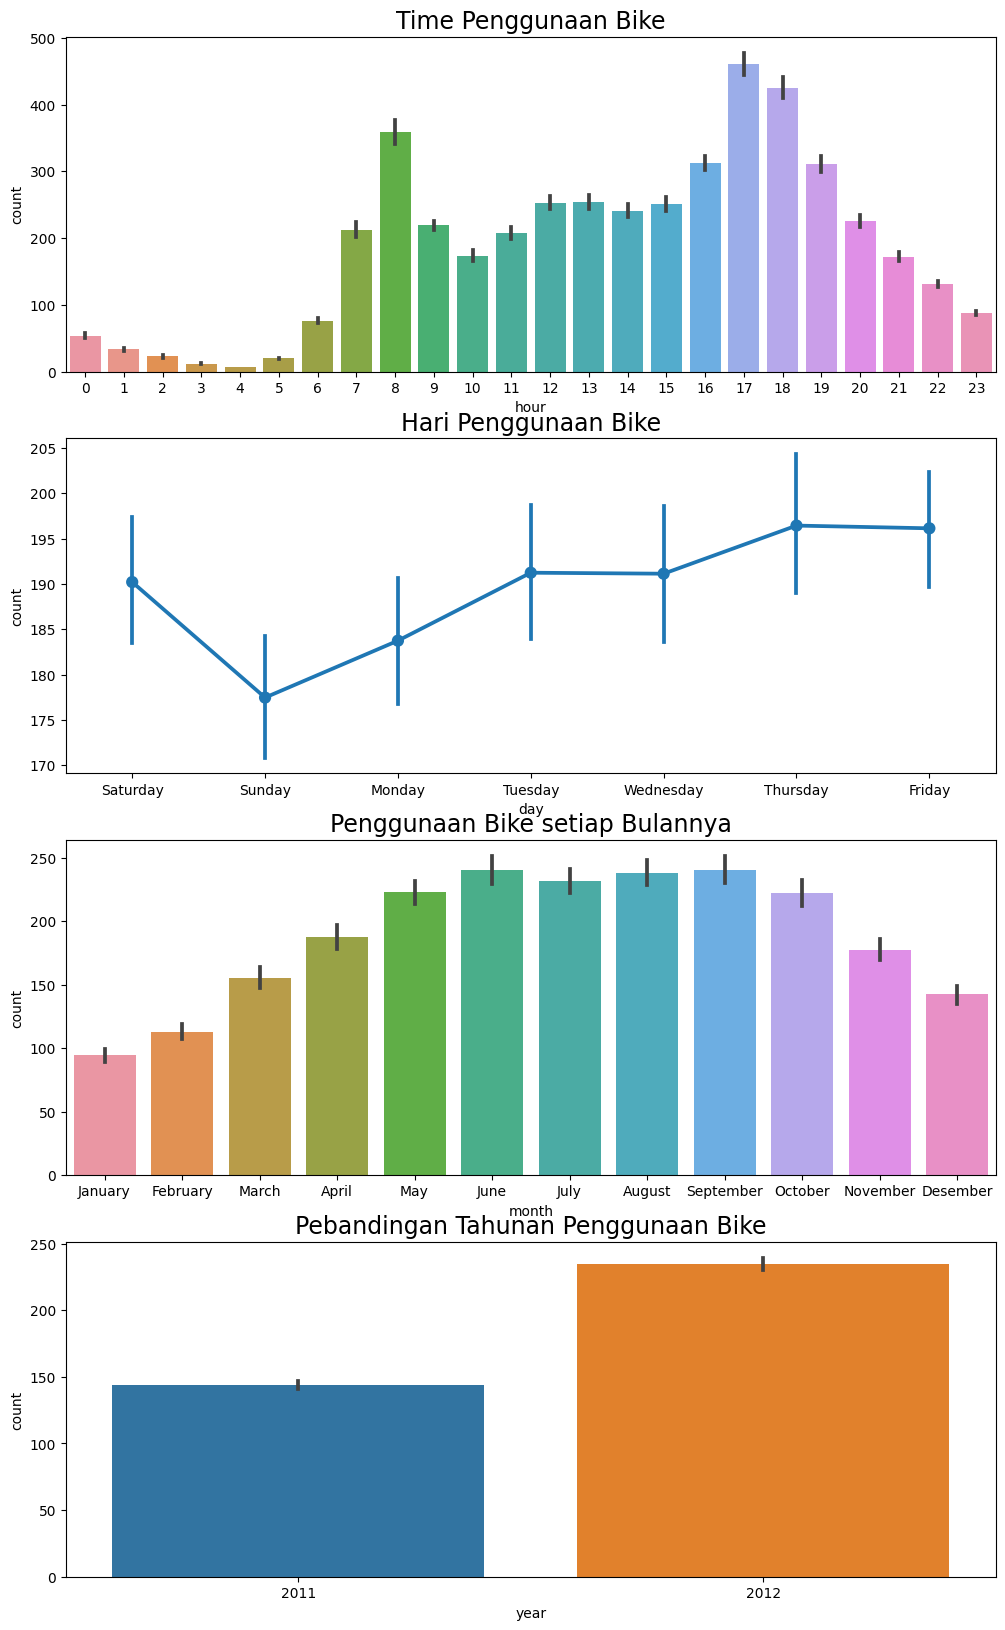

In [10]:
fig, ax = plt.subplots(nrows=4)
fig.set_size_inches(12, 20)

a0 = sns.barplot(data=data, x='hour', y='count', ax=ax[0]);
a1 = sns.pointplot(data= data, x='day', y='count', ax=ax[1]);
a2 = sns.barplot(data= data, x='month', y='count', ax=ax[2]);
a3 = sns.barplot(data= data, x='year', y='count', ax=ax[3]);

a0.set_title('Time Penggunaan Bike', fontdict={'size':17})
a1.set_title('Hari Penggunaan Bike', fontdict={'size':17})
a2.set_title('Penggunaan Bike setiap Bulannya', fontdict={'size':17})
a3.set_title('Pebandingan Tahunan Penggunaan Bike', fontdict={'size':17});

***Insight dari Perbandingan***

> *1. Penggunaan Bike secara besar-besaran terjadi di jam 5:00 PM - 6:00 PM (17:00 - 18:00) dan 8:00 AM*

> *2. Pemakaian Bike selama satu minggu (Sunday-Suterday) semakin meningkat dan puncaknya di Thusday dan Friday*

> *3. Setiap bulan ada penggunaan Bike, namun hanya pada 3 bulan saja yang meningkat dari June hingga September*

> *4. berdasarkan data yang ada, terjadi peningkatan penggunaan tahunan, yaitu tauhn 2012 lebih besar dari 2011*

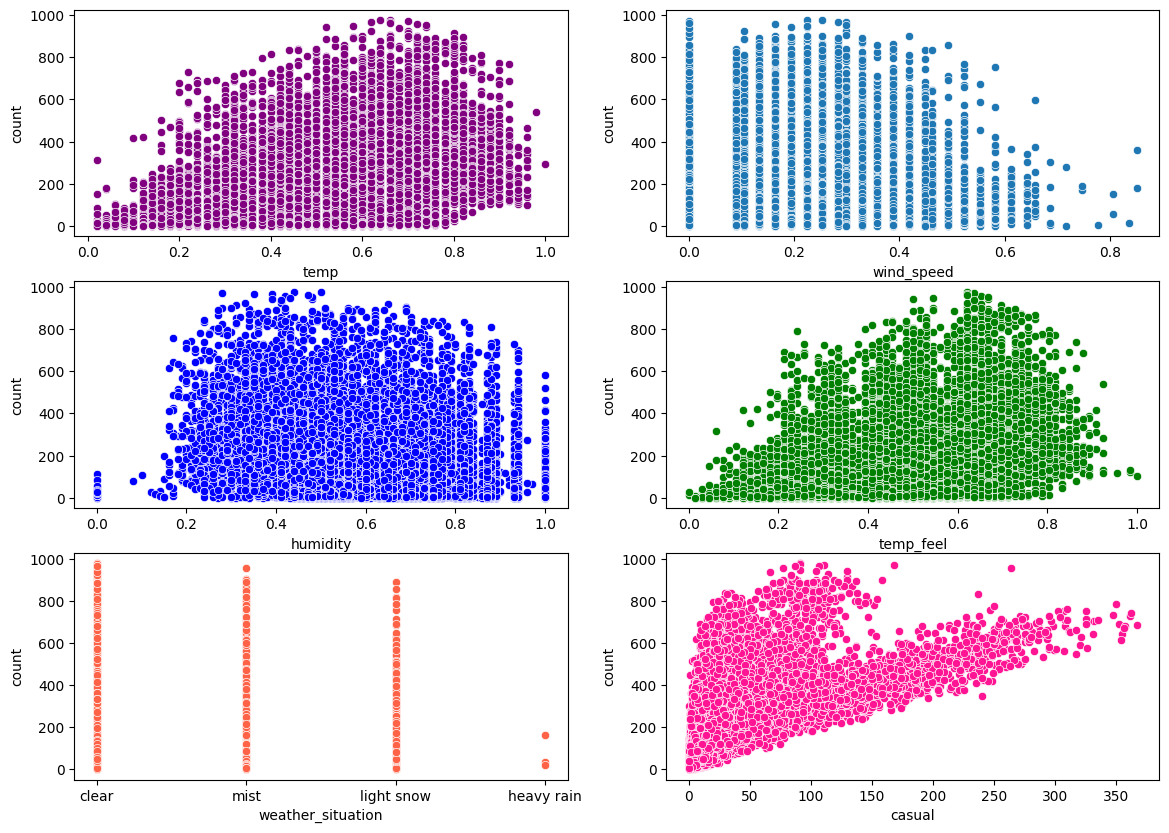

In [11]:
fig, (ax1, ax2, ax3) = plt.subplots(3,2)
fig.set_size_inches(14, 10)

sns.scatterplot(x='temp', y='count', data=data, ax=ax1[0], color='purple')
sns.scatterplot(x='wind_speed', y='count', data=data, ax=ax1[1])
sns.scatterplot(x='humidity', y='count', data=data, ax=ax2[0], color='b')
sns.scatterplot(x='temp_feel', y='count', data=data, ax=ax2[1], color='green')
sns.scatterplot(x='weather_situation', y='count', data=data, ax=ax3[0], color='tomato')
sns.scatterplot(x='casual', y='count', data=data, ax=ax3[1], color='deeppink');

**Penggalian Informasi:**

> *1. pada variable 'temp' sedikit sekali ditemukan data outlier. artinya para rentalers ini menggunakan bike saat temp naik, atau berada diatas rata-rata kisaran diangka 0.6-08*

> *2. terlacak outlier pada variable 'wind_speed', dapat dipastikan setelah poin 0.7 dan 0.8*

> *3. pada variable 'humidity' ditemukan outlier pada poin 0.0. artinya ialah mereka lebih mendomenasi di atas poin 0.0 karena menandakan kecerahan lingkungan, alam dan cuaca semakin bersahabat*

> *4. sebagian besar tidak ada outlier pada variable 'temp_feel'. ini menjadi salah satu faktor memicu para bikers jika temp_feel meningkat maka mereka senantiasa keluar, tentu tidak melupankan aspek-aspek lain*

> *5. Di variable 'weather_situation' terdapat 'heavy rain' bukanlah menunjukan sebuah outlier melainkan sepinya peminat bike. ini juga yang menjadikan alasan pada musim hujan besar skala pemakaian relatif kecil*

> *6. terditeksi outlier pada variable 'casual' tepat pada kawasan poin 350, gaya dan metode mereka semakin tinggi ketika keadan alam stabil*

## Conclusion

- Conclution pertanyaan 1
- conclution pertanyaan 2

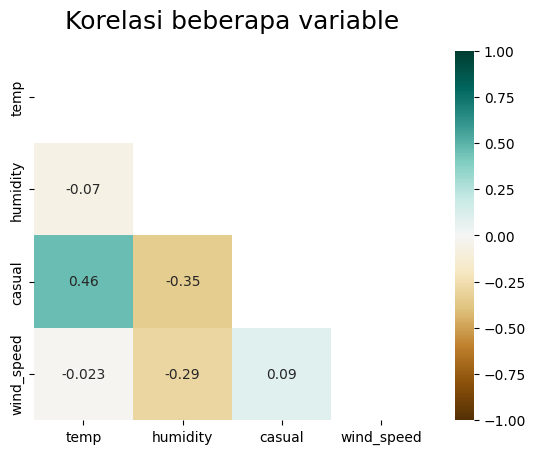

In [12]:

cor = data[['temp','humidity', 'casual', 'wind_speed']].corr()
mask = np.triu(np.ones_like(cor))
heatmap = sns.heatmap(cor, mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Korelasi beberapa variable', fontdict={'fontsize':18}, pad=16);

> *1. Korelasi positif antara temp dengan casual, dibuktikan dengan nilai 0.46 atau dengan color mendekati warna biru*
>> *notice: dengan artian semakin tinggi nilai temp maka akan mempengaruhi terhadap casual*

> *2. Sebaliknya hubungan humidity dengan wind_speend bernilai negatif, ini menandakan dari keduanya betolak belakang, dan disusul humidity dengan casual*


 # Kesimpulan

 1. Berdasarkan hasil galian data di atas, dengan metode analisis sebagai pisau bedahnya. maka bisa menjawab berbagai pertanyaan seputar rental bike. metode penerawangan data dengan strategi analisis dapat memberikan gambaran secara gelobal terhadap pola bisnis
kedepannya ditentukan oleh dua faktor utama keadaan musim dan cuaca. dari empat musim yang dilalui dapat disimpulkan bahwa
musim gugur dengan temperatur dan keadaan alam cerah dapat menjadi loncatan besar terhadap pelaku bisnis rental. Tepatnya pada hari senin sabtu. bahkan jika melihat kepada perubahan dari tahun ketahun yang semakin meningkat. maka dari itu penambahan karyawan dapat di lakukan pada
musim gugur dari bulan june hingga pertengahan september. tentu tampa mengabaikan cuaca dan suhu peralihan musim dari gugur
ke musim panas,  musim panas masih menjadi peringkat kedua dari para customers.
artinya dapat dipertimbangkan kembali untuk penambahan dan pengurangan karyawan di bulan-bulan tertentu.


2. Data permusim menunjukkan bahwa customers meminati bike semakin meningkat hal itu terbukti di tahun 2012 mengalami kenaikan
yang siknifikan. di tambah lagi dari data working dan holiday para penggemar bike tidak mengalami penurunan.
ini membuktikan bahwa menaiki bike menjadikan hidup mereka semakin sehat karena kerja sambil olah raga, dan aktifitas lainya
juga ditempuh menggunakan bike. sehingga tertanam di dalam diri mereka bike membuat sehat. inilah salah satu faktor kenapa para
penggemar memiliki bike sebagai alternatifnya. hingga mereka memiliki ketergantungan yang cukup besar terhadap bike hal itu
ditunjukan data secara umum bahwa berangkat kerja ditempuh dengan bike karena data working menggunakan bike meningkat dari pada
holiday